# Append Attributes to Fractures

Sometimes we want to either visualise or analyse fractures by some other attribute that varies along the well path. This notebook illustrates a method for appending attributes to the fracture dataframe to make this possible. 

The method illustrated here only works where the category values are unique. To illustrate basic usage, Example 1 uses an attribute dataframe (dfstrat) that meets this condition. To illustrate one way of solving the issue of non-unique values, Example 2 uses an attribute dataframe (dfstifness) where 'Hard Rock' repeats.

Visualisation examples with fractures depth and on a stereonet are included. These illustrate how data can be plotted by attribute using the Seaborn and mplstereonet plot libraries.  

**WARNING** Methods in this Juypter Notebook are split across cells for readability. Therefore there is a risk of running part of the method out of order. Keep an eye on the order or use 'Run - Run All Cells' from the dropdown menu.   

In [111]:
# Python version = 3.6
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet as mpls
import seaborn as sns
%matplotlib inline

## Import fracture data 

Pandas dataframes are an ideal tool for handlling tabular data

In [112]:
dffractures = pd.read_csv(r'testdata-fractures.csv')
dffractures.head()

,depth_mMDRF,dipazimuth_deg,dip_deg,type
0,1224.559944,174.87238,78.54814,Cond_FTCC
1,1224.830215,171.09971,71.07558,Cond_FTCC
2,1225.193391,170.17670,70.48370,Cond_FTCC
3,1225.535453,168.36274,69.19910,Cond_FTCC
4,1226.063326,174.29375,72.06275,Cond_FTCC


## Example 1: Attributes are Unique

An example where attributes do not repeat with depth so no rearrangement is required to use the pandas.cut() method to append attributes to the fracture dataframe. 

In both Example 1 and 2, the attribute dataframe is created using the dictionary method. If you have data in a csv, you can import these using the same method used for the fractures above. 

In [113]:
data = {
    'from': [1219, 1400, 1600, 2000], 
    'to': [1400, 1600, 2000, 2152], 
    'rocktype': ['Some Rock', 
                 'Exciting Rock', 
                 'Another Rock', 
                 'Almost Rock'],
}

dfstrat = pd.DataFrame(data=data)
dfstrat

,from,to,rocktype
0,1219,1400,Some Rock
1,1400,1600,Exciting Rock
2,1600,2000,Another Rock
3,2000,2152,Almost Rock


In [114]:
# call the unit tops to a list
bins_strat = dfstrat['from'].to_list()

# append the deepest value to the bins list
bins_strat.append(dfstrat['to'].iloc[-1])

print(bins_strat)

[1219, 1400, 1600, 2000, 2152]


In [115]:
# make a list of the unit names
units_strat = dfstrat['rocktype'].to_list()

print(units_strat)

['Some Rock', 'Exciting Rock', 'Another Rock', 'Almost Rock']


In [116]:
# append units to the fracture dataframe based on depth
dffractures['strat'] = pd.cut(dffractures['depth_mMDRF'],
                              bins_strat,
                              labels=units_strat)

print(dffractures['strat'].value_counts(),'\n')

dffractures.head(3)

Almost Rock      608
Another Rock     349
Some Rock         94
Exciting Rock     91
Name: strat, dtype: int64 



,depth_mMDRF,dipazimuth_deg,dip_deg,type,strat
0,1224.559944,174.87238,78.54814,Cond_FTCC,Some Rock
1,1224.830215,171.09971,71.07558,Cond_FTCC,Some Rock
2,1225.193391,170.17670,70.48370,Cond_FTCC,Some Rock


## Example 2: Attributes are not Unique

An example where attributes repeat so a unique code is appended to the attribute dataframe for use in the pandas.cut() method. Once appended to the fracture dataframe, these codes are replaced by their equivalent attributes value using the df.replace() method.  

In [117]:
data = {
    'from': [1219, 1400, 1600, 2000], 
    'to': [1400, 1600, 2000, 2152], 
    'rocktype': ['Hard Rock', 
                 'Soft Rock', 
                 'Hard Rock', 
                 'Classical'],
}

dfstifness = pd.DataFrame(data=data)

dfstifness

,from,to,rocktype
0,1219,1400,Hard Rock
1,1400,1600,Soft Rock
2,1600,2000,Hard Rock
3,2000,2152,Classical


In [118]:
# Append a unique code

dfstifness['code'] = [1, 2, 3, 4]

dfstifness

,from,to,rocktype,code
0,1219,1400,Hard Rock,1
1,1400,1600,Soft Rock,2
2,1600,2000,Hard Rock,3
3,2000,2152,Classical,4


In [119]:
# call the unit tops to a list
bins_stifness = dfstifness['from'].to_list()

# append the deepest value to the bins list
bins_stifness.append(dfstifness['to'].iloc[-1])

print(bins_stifness)

[1219, 1400, 1600, 2000, 2152]


In [120]:
# make a list of the unit names
units_stifness = dfstifness['code'].to_list()

print(units_stifness)

[1, 2, 3, 4]


In [121]:
# append unit codes to the fracture dataframe based on depth
dffractures['stiffness'] = pd.cut(dffractures['depth_mMDRF'],
                                  bins_stifness,
                                  labels = units_stifness)

print(dffractures['stiffness'].value_counts(),'\n')

dffractures.head(3)

4    608
3    349
1     94
2     91
Name: stiffness, dtype: int64 



,depth_mMDRF,dipazimuth_deg,dip_deg,type,strat,stiffness
0,1224.559944,174.87238,78.54814,Cond_FTCC,Some Rock,1
1,1224.830215,171.09971,71.07558,Cond_FTCC,Some Rock,1
2,1225.193391,170.17670,70.48370,Cond_FTCC,Some Rock,1


In [122]:
# Pandas requires datatypes to be the same when using .replace
# so the integer codes are first converted from integer to string
dffractures['stiffness'] = dffractures['stiffness'].apply(str)

# replace codes with attribute name
dffractures['stiffness'].replace({
    '1': 'Hard Rock',
    '2': 'Soft Rock',
    '3': 'Hard Rock',
    '4': 'Classical',
}, inplace=True)

print(dffractures['stiffness'].value_counts(),'\n')

dffractures.head(3)

Classical    608
Hard Rock    443
Soft Rock     91
Name: stiffness, dtype: int64 



,depth_mMDRF,dipazimuth_deg,dip_deg,type,strat,stiffness
0,1224.559944,174.87238,78.54814,Cond_FTCC,Some Rock,Hard Rock
1,1224.830215,171.09971,71.07558,Cond_FTCC,Some Rock,Hard Rock
2,1225.193391,170.17670,70.48370,Cond_FTCC,Some Rock,Hard Rock


# Visualisation examples

Note that these plot examples lack a sensible pattern because the attribute data were invented.

# Dip azumuth by depth coloured by stifness

A by-depth plot generated using the Seyborn plotting library. 

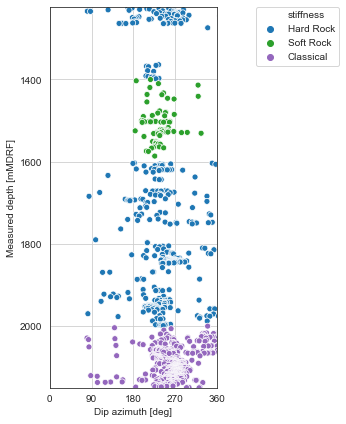

In [123]:
color_dict = dict({
    'Hard Rock': 'tab:blue',
    'Soft Rock': 'tab:green',
    'Classical': 'tab:purple',
})

sns.set_style("white")

f,ax = plt.subplots(1, 1, figsize = (3, 7))

sns.scatterplot(x='dipazimuth_deg', 
                y='depth_mMDRF', 
                hue='stiffness', 
                data=dffractures, 
                palette=color_dict, 
                ax=ax)

ax.grid()

ax.set_ylim(dffractures['depth_mMDRF'].max(),
            dffractures['depth_mMDRF'].min())
ax.set_xlim(0,360)
ax.set_xticks([0,90,180,270,360])

ax.set_xlabel('Dip azimuth [deg]')
ax.set_ylabel('Measured depth [mMDRF]')

ax.legend(bbox_to_anchor=(1.2, 1.015))

plt.show()

# Stereonet with fractures plotted by lithology

Pandas boolean statements can be used to filter the dataframe so fractures can be plotted by lithology.

In [124]:
# calculate strike using dip azumuth and dip

def dip2strike(dipazim,dip):
    '''Convert dip-dipazimuth data to strike 
    using the right-hand rule convention'''
    if dipazim < 90:
        strike=(dipazim-90)+360
    else:
        strike=dipazim-90
    return strike

dffractures['strike'] = [dip2strike(x, y) 
                         for x, y 
                         in zip(dffractures['dipazimuth_deg'], 
                                dffractures['dip_deg']
                               )
                        ]

dffractures.head()

,depth_mMDRF,dipazimuth_deg,dip_deg,type,strat,stiffness,strike
0,1224.559944,174.87238,78.54814,Cond_FTCC,Some Rock,Hard Rock,84.87238
1,1224.830215,171.09971,71.07558,Cond_FTCC,Some Rock,Hard Rock,81.09971
2,1225.193391,170.17670,70.48370,Cond_FTCC,Some Rock,Hard Rock,80.17670
3,1225.535453,168.36274,69.19910,Cond_FTCC,Some Rock,Hard Rock,78.36274
4,1226.063326,174.29375,72.06275,Cond_FTCC,Some Rock,Hard Rock,84.29375


In [125]:
# filter data by strat unit

'''
Fracture counts for each strat
Almost Rock      608
Another Rock     349
Some Rock         94
Exciting Rock     91
'''

dfalmost = dffractures[(dffractures['strat'] == 'Almost Rock')].copy()
print(dfalmost['strat'].value_counts(),'\n')

dfanother = dffractures[(dffractures['strat'] == 'Another Rock')].copy()
print(dfanother['strat'].value_counts(),'\n')

dfsome = dffractures[(dffractures['strat'] == 'Some Rock')].copy()
print(dfsome['strat'].value_counts(),'\n')

dfexciting = dffractures[(dffractures['strat'] == 'Exciting Rock')].copy()
print(dfexciting['strat'].value_counts(),'\n')

Almost Rock      608
Another Rock       0
Exciting Rock      0
Some Rock          0
Name: strat, dtype: int64 

Another Rock     349
Almost Rock        0
Exciting Rock      0
Some Rock          0
Name: strat, dtype: int64 

Some Rock        94
Almost Rock       0
Another Rock      0
Exciting Rock     0
Name: strat, dtype: int64 

Exciting Rock    91
Almost Rock       0
Another Rock      0
Some Rock         0
Name: strat, dtype: int64 



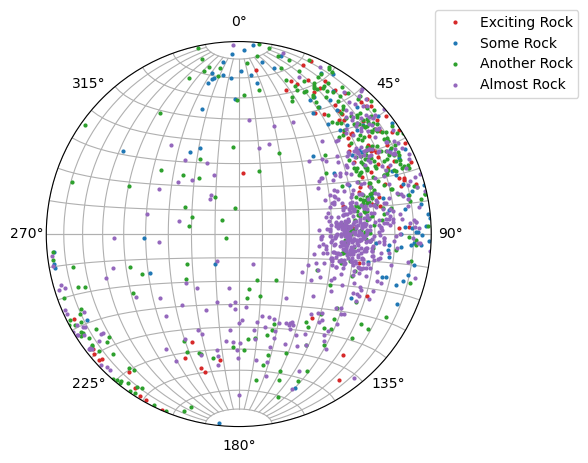

In [126]:
# this reset is used because seaborn was used above
sns.reset_defaults()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(1,1,1, projection= 'equal_area_stereonet')

ax.pole(dfexciting['strike'], 
        dfexciting['dip_deg'], 
        'o', 
        color='tab:red', 
        markersize=2, 
        label='Exciting Rock')

ax.pole(dfsome['strike'], 
        dfsome['dip_deg'], 
        'o', 
        color='tab:blue', 
        markersize=2, 
        label='Some Rock')

ax.pole(dfanother['strike'], 
        dfanother['dip_deg'], 
        'o', 
        color='tab:green', 
        markersize=2, 
        label='Another Rock')

ax.pole(dfalmost['strike'], 
        dfalmost['dip_deg'], 
        'o', 
        color='tab:purple', 
        markersize=2, 
        label='Almost Rock')


ax.legend(bbox_to_anchor=(1.4, 1.1))

ax.grid()

plt.show() 